In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Processing data

In [2]:
rca = pd.read_csv('../../data/final/rca_ensemb.csv').query('data_check == "pass"')
rca

,text_embed,ensemb_embed,norm,train_n,r2_text,r2_ensemb,data_check,penalty_check
1,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.077117,0.187237,pass,NaN
2,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.122588,0.229640,pass,NaN
3,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.024810,0.156903,pass,NaN
4,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.070370,0.206195,pass,NaN
6,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_KF,7806,0.203933,0.267469,pass,NaN
...,...,...,...,...,...,...,...,...
5615,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.327612,0.397434,pass,NaN
5616,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.419313,0.454356,pass,NaN
5617,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.302843,0.350385,pass,NaN
5618,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.382505,0.423304,pass,NaN


In [3]:
# Changing category names to custom cat names
meta = pd.read_csv('../../data/final/norm_metadata.csv', index_col=0)
meta

,description,link,citation,category,associated_embed,type,n_ratings
Freq_HAL,Log10 version of frequency norms based on the ...,https://elexicon.wustl.edu/,"Lund, K. and C. Burgess (1996). ""Producing hig...",frequency,NaN,continuous,79671
Freq_KF,Log10 version of frequency norms based on the ...,https://elexicon.wustl.edu/,"Kučera, H. and W. N. Francis (1967). Computati...",frequency,NaN,continuous,35230
Freq_SUBTLEXUS,Log10 version of frequency norms based on the ...,https://www.ugent.be/pp/experimentele-psycholo...,"Brysbaert, M. and B. New (2009). ""Moving beyon...",frequency,NaN,continuous,57214
Freq_SUBTLEXUK,Log10 version of the frequency norms based on ...,http://crr.ugent.be/archives/1423; https://psy...,"Van Heuven, W. J., et al. (2014). ""SUBTLEX-UK:...",frequency,NaN,continuous,61843
Freq_Blog,Log10 version of the frequency norms based on ...,http://www.lexique.org/?page_id=250,"Gimenes, M. and B. New (2016). ""Worldlex: Twit...",frequency,NaN,continuous,70646
...,...,...,...,...,...,...,...
goals_vanarsdall,Ratings from 1 (low goal directedness) to 7 (h...,https://osf.io/4t3cu,"@article{vanarsdall2022analyzing,\n title={An...",animacy,NaN,continuous,1200
movement_vanarsdall,Ratings from 1 (low movement likelihood) to 7 ...,https://osf.io/4t3cu,"@article{vanarsdall2022analyzing,\n title={An...",animacy,NaN,continuous,1200
concreteness_vanarsdall,Ratings from 1 (highly abstract) to 7 (highty ...,https://osf.io/4t3cu,"@article{vanarsdall2022analyzing,\n title={An...",concreteness,NaN,continuous,1200
familiarity_vanarsdall,Ratings from 1 (highly unfamiliar) to 7 (highl...,https://osf.io/4t3cu,"@article{vanarsdall2022analyzing,\n title={An...",familiarity,NaN,continuous,1200


In [4]:
rca['norm_category'] = (
    rca['norm'].apply(lambda norm: meta.loc[norm]['category'])
    .replace({'_': ' ', '/': ' / '}, regex=True)
)
rca

,text_embed,ensemb_embed,norm,train_n,r2_text,r2_ensemb,data_check,penalty_check,norm_category
1,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.077117,0.187237,pass,NaN,frequency
2,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.122588,0.229640,pass,NaN,frequency
3,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.024810,0.156903,pass,NaN,frequency
4,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.070370,0.206195,pass,NaN,frequency
6,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_KF,7806,0.203933,0.267469,pass,NaN,frequency
...,...,...,...,...,...,...,...,...,...
5615,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.327612,0.397434,pass,NaN,imageability
5616,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.419313,0.454356,pass,NaN,imageability
5617,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.302843,0.350385,pass,NaN,imageability
5618,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.382505,0.423304,pass,NaN,imageability


In [5]:
rca['r2_diff'] = rca['r2_ensemb'] - rca['r2_text']
rca['behavior_embed'] = rca['ensemb_embed'].str.split('&').str[1]

# Taking only best embeds
# rca = rca.query('behavior_embed == "PPMI_SVD_SWOW" & text_embed == "fastText_CommonCrawl"')
rca

,text_embed,ensemb_embed,norm,train_n,r2_text,r2_ensemb,data_check,penalty_check,norm_category,r2_diff,behavior_embed
1,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.077117,0.187237,pass,NaN,frequency,0.110120,PPMI_SVD_SWOW
2,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.122588,0.229640,pass,NaN,frequency,0.107052,PPMI_SVD_SWOW
3,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.024810,0.156903,pass,NaN,frequency,0.132093,PPMI_SVD_SWOW
4,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_HAL,9068,0.070370,0.206195,pass,NaN,frequency,0.135825,PPMI_SVD_SWOW
6,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,Freq_KF,7806,0.203933,0.267469,pass,NaN,frequency,0.063536,PPMI_SVD_SWOW
...,...,...,...,...,...,...,...,...,...,...,...
5615,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.327612,0.397434,pass,NaN,imageability,0.069823,SGSoftMaxEncoder_SWOW
5616,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.419313,0.454356,pass,NaN,imageability,0.035043,SGSoftMaxEncoder_SWOW
5617,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.302843,0.350385,pass,NaN,imageability,0.047542,SGSoftMaxEncoder_SWOW
5618,GloVe_CommonCrawl,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,imageability_vanarsdall,959,0.382505,0.423304,pass,NaN,imageability,0.040799,SGSoftMaxEncoder_SWOW


In [6]:
rca_mean = (
    rca[['norm_category', 'ensemb_embed',  'r2_diff']]
    .groupby(['norm_category', 'ensemb_embed'], as_index=False).agg(['mean', 'std'])
    .reset_index()
)
rca_mean.columns =['norm_category', 'ensemb_embed', 'r2_diff_mean', 'r2_diff_std']
rca_mean

,norm_category,ensemb_embed,r2_diff_mean,r2_diff_std
0,age of acquisition,GloVe_CommonCrawl&PPMI_SVD_SWOW,0.010435,0.064827
1,age of acquisition,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.029342,0.058922
2,age of acquisition,fastText_CommonCrawl&PPMI_SVD_SWOW,0.012190,0.035749
3,age of acquisition,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.032825,0.049199
4,animacy,GloVe_CommonCrawl&PPMI_SVD_SWOW,0.007933,0.017752
...,...,...,...,...
91,valence,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,0.068845,0.026307
92,visual lexical decision,GloVe_CommonCrawl&PPMI_SVD_SWOW,-0.005605,0.033625
93,visual lexical decision,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.011987,0.024008
94,visual lexical decision,fastText_CommonCrawl&PPMI_SVD_SWOW,-0.003722,0.026003


In [7]:
# Sorts norm_category by grand mean of r2_diff 
categories = (
    rca_mean
    .groupby('norm_category')['r2_diff_mean'].mean().sort_values().index
)
rca_mean['norm_category'] = pd.Categorical(
    rca_mean['norm_category'], categories=categories, ordered=True
)
rca_mean = rca_mean.sort_values('norm_category').reset_index(drop=True)
rca_mean

,norm_category,ensemb_embed,r2_diff_mean,r2_diff_std
0,age of acquisition,GloVe_CommonCrawl&PPMI_SVD_SWOW,0.010435,0.064827
1,age of acquisition,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.029342,0.058922
2,age of acquisition,fastText_CommonCrawl&PPMI_SVD_SWOW,0.012190,0.035749
3,age of acquisition,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.032825,0.049199
4,visual lexical decision,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,-0.011987,0.024008
...,...,...,...,...
91,valence,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,0.068845,0.026307
92,dominance,fastText_CommonCrawl&PPMI_SVD_SWOW,0.119264,0.030048
93,dominance,GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW,0.064555,0.013051
94,dominance,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,0.069974,0.020264


In [8]:
rca['ensemb_embed'].unique()

array(['fastText_CommonCrawl&PPMI_SVD_SWOW',
       'fastText_CommonCrawl&SGSoftMaxEncoder_SWOW',
       'GloVe_CommonCrawl&PPMI_SVD_SWOW',
       'GloVe_CommonCrawl&SGSoftMaxEncoder_SWOW'], dtype=object)

# Plotting

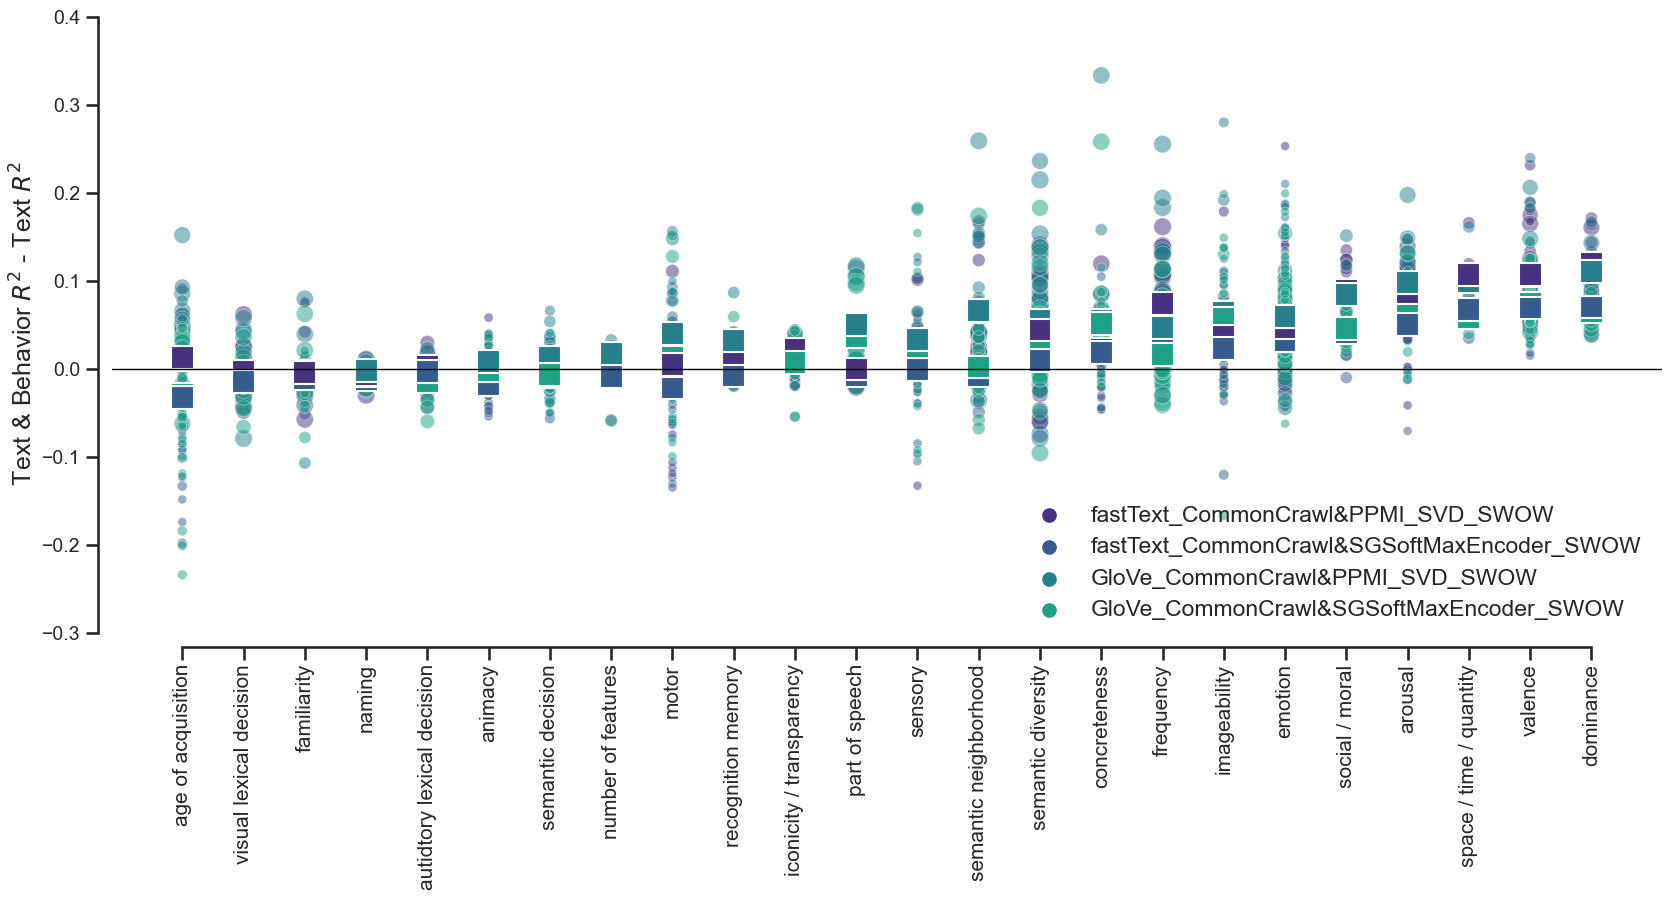

In [9]:
# 3 colors close to and including #440154'
sns.set(context='talk', style='white', palette='viridis')
fig, ax = plt.subplots(figsize=(20, 8))

# grand means
hue_order = rca['ensemb_embed'].unique()
sns.scatterplot(
    rca_mean, 
    marker='s', x='norm_category', y='r2_diff_mean', hue='ensemb_embed',
    s=270, edgecolor='white', linewidth=1.5, hue_order=hue_order,
    zorder=2, ax=ax
)

# individual norms
sns.scatterplot(
    rca,
    marker='o', x='norm_category', y='r2_diff', hue='ensemb_embed',
    size='train_n',  alpha=.5, zorder=0, hue_order=hue_order, 
    ax=ax, legend=False
)

# ax.legend_.remove()

ymin, ymax, step = -.3, .4, .1
ax.set(
    ylim=(ymin, ymax), xlabel='', ylabel=' Text & Behavior $R^2$ - Text $R^2$ ',
    yticks=np.arange(ymin, ymax + step, step)
)
ax.axhline(0, color='black', lw=1)
ax.tick_params(axis='x', rotation=90, which='both', bottom=True, top=False, labelbottom=True, labelsize=15)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelsize=14)

# Moves legend to bottom right
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.24), frameon=False)

sns.despine(offset=10, trim=True)
plt.savefig('../../figures/rca_ensemb.png', dpi=300, bbox_inches='tight')

In [10]:
rca.sort_values(by='train_n')

,text_embed,ensemb_embed,norm,train_n,r2_text,r2_ensemb,data_check,penalty_check,norm_category,r2_diff,behavior_embed
1348,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,imageability_davies,679,0.682817,0.679170,pass,NaN,imageability,-0.003647,PPMI_SVD_SWOW
1342,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,aoa_davies,679,0.557519,0.539664,pass,NaN,age of acquisition,-0.017855,PPMI_SVD_SWOW
1343,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,aoa_davies,679,0.480330,0.428292,pass,NaN,age of acquisition,-0.052038,PPMI_SVD_SWOW
1344,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,aoa_davies,679,0.161048,0.146169,pass,NaN,age of acquisition,-0.014879,PPMI_SVD_SWOW
1345,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,imageability_davies,679,0.509786,0.531545,pass,NaN,imageability,0.021759,PPMI_SVD_SWOW
...,...,...,...,...,...,...,...,...,...,...,...
1439,fastText_CommonCrawl,fastText_CommonCrawl&SGSoftMaxEncoder_SWOW,Freq_News,9204,0.091400,0.165116,pass,NaN,frequency,0.073716,SGSoftMaxEncoder_SWOW
61,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,CD_Twitter,9204,0.502911,0.561958,pass,NaN,semantic diversity,0.059046,PPMI_SVD_SWOW
62,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,CD_Twitter,9204,0.519528,0.567103,pass,NaN,semantic diversity,0.047574,PPMI_SVD_SWOW
64,fastText_CommonCrawl,fastText_CommonCrawl&PPMI_SVD_SWOW,CD_Twitter,9204,0.164704,0.305213,pass,NaN,semantic diversity,0.140509,PPMI_SVD_SWOW
